<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2024/blob/main/03_Correlation_and_Visualizing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlation and Visualizing Data

## Quick Exercise

Plot:
* 10:36 - 2
* 10:37 - 1
* 10:38 - 8
* 10:39 - 1

<Axes: xlabel='time', ylabel='num_students'>

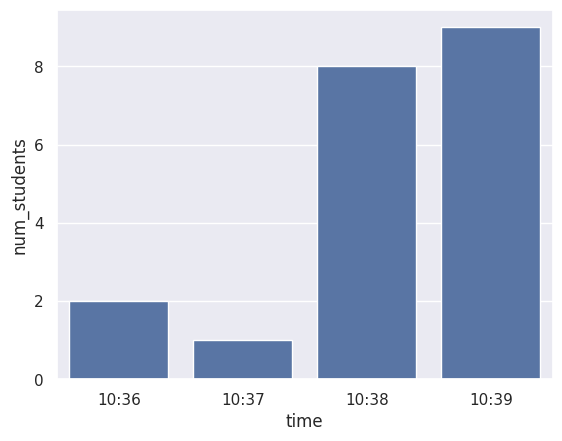

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame([["10:36", 2], ["10:37", 1], ["10:38", 8], ["10:39", 9]])
df.columns = ["time", "num_students"]
sns.set_theme()
sns.barplot(data=df, x="time", y="num_students")

## Setup

In [ ]:
import pandas as pd
import seaborn as sns
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's load in the morphological and transcriptomics data for mouse cells.

This is faster thank working w/ the morph and gene files sparately -- Mr. Feng used pandas.join() to combine them into one dataset. The transcriptomic dataset originally had thousands of cells, but this one only has those where we have both morph and gene data.

In [ ]:
cells = pd.read_csv(
    '/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/genes_morph.csv',
    index_col="cell_specimen_id"
)

In [ ]:
# Show data frame
cells

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,all_neurites.num_tips,basal_dendrite.num_tips,dendrite.num_nodes,axon.num_nodes,all_neurites.num_nodes,basal_dendrite.num_nodes,dendrite.num_branches,axon.num_branches,all_neurites.num_branches,basal_dendrite.num_branches
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.216454,0.000000,...,32.0,12.0,1799.0,1880.0,3680.0,1799.0,22.0,39.0,62.0,22.0
601790961,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,169.0,24.0,2840.0,9492.0,12333.0,2840.0,42.0,289.0,336.0,42.0
601803754,0.0,0.0,0.000000,69.658825,0.000000,0.000000,0.000000,0.000000,1.698996,0.000000,...,381.0,35.0,2441.0,18898.0,21340.0,2441.0,62.0,691.0,760.0,62.0
601808698,0.0,0.0,152.239614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674515,...,265.0,23.0,1789.0,11775.0,13565.0,1789.0,42.0,483.0,528.0,42.0
601810307,0.0,0.0,165.312294,0.000000,0.000000,0.000000,0.000000,0.000000,25.931340,19.448505,...,285.0,27.0,2149.0,11433.0,13583.0,2149.0,48.0,515.0,568.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963055521,0.0,0.0,46.237643,46.237643,18.495057,0.000000,46.237643,0.000000,231.188215,0.000000,...,56.0,33.0,3492.0,21.0,3514.0,2023.0,102.0,1.0,110.0,59.0
963063283,0.0,0.0,57.018453,15.550487,5.183496,0.000000,5.183496,0.000000,114.036906,0.000000,...,38.0,25.0,2979.0,23.0,3003.0,1926.0,66.0,1.0,74.0,43.0
992386952,0.0,0.0,131.578123,0.000000,0.000000,0.000000,0.000000,0.000000,106.515623,0.000000,...,123.0,15.0,1312.0,6870.0,8183.0,1312.0,27.0,215.0,244.0,27.0


## Exploring the data

Let's calculate the surface area to volume ratio of our cells, and add it to the dataframe:

In [ ]:
cells["dendrite.sa_to_vol"] = cells["dendrite.total_surface_area"] / cells["dendrite.total_volume"]

We can now access this as we would any other column in the dataframe:

In [ ]:
cells["dendrite.sa_to_vol"]

cell_specimen_id
601506507    7.524696
601790961    7.041403
601803754    5.954947
601808698    7.129930
601810307    7.687275
               ...   
963055521    5.537477
963063283    4.932737
992386952    7.557409
992268582    6.415364
992830261    7.674917
Name: dendrite.sa_to_vol, Length: 573, dtype: float64

Let's see if we can find any correlation between dendrite SA to vol ratio and num of branches

0.09178796952371189


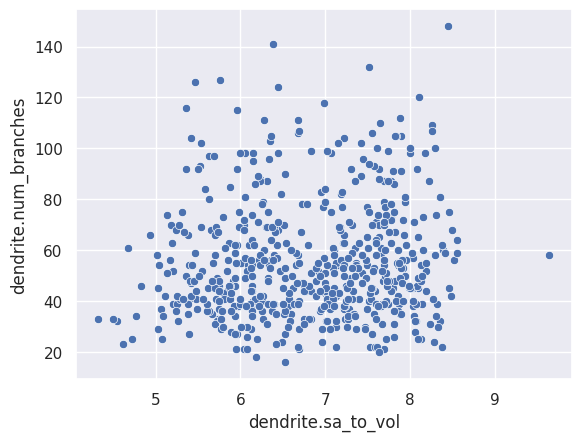

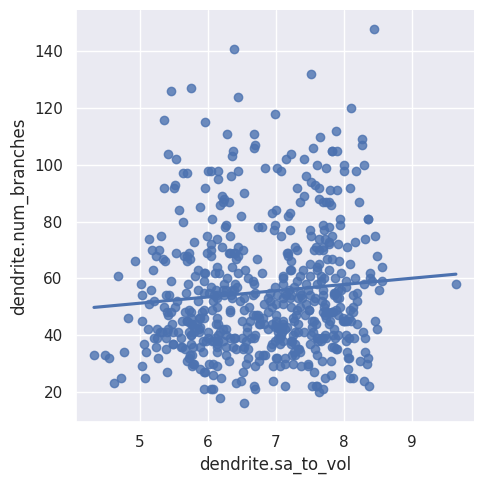

In [ ]:
# Get the correlation coefficient between our two columns
print(cells["dendrite.sa_to_vol"].corr(cells["dendrite.num_branches"]))

# Plot the correlation
sns.scatterplot(data=cells, x="dendrite.sa_to_vol", y="dendrite.num_branches")

sns.lmplot(data=cells, x="dendrite.sa_to_vol", y="dendrite.num_branches", ci=None)

## Correlation Morph and Transcriptomic Data

In [ ]:
cells.columns[-25:] # We can see that the last 25 cols are our morph data, rest are gene

# Puts everything from start of data frame up to (but not including) the 25th-to-last
# cell into a dataframe called gene_data
# .iloc[r, c] -> Gets a slice of the dataframe according to row and col #
gene_data = cells.iloc[:, :-25] # all rows, all columns from start until 25th-to-last

# Puts the last 25 cols into a morph_data dataframe
morph_data = cells.iloc[:, -25:] # all rows, all columns from 25-th-to-last to end

In [ ]:
gene_data

,0610005C13Rik,0610006L08Rik,0610007P14Rik,0610009B22Rik,0610009E02Rik,0610009L18Rik,0610009O20Rik,0610010B08Rik,0610010F05Rik,0610010K14Rik,...,n-R5s134,n-R5s136,n-R5s138,n-R5s139,n-R5s141,n-R5s142,n-R5s143,n-R5s144,n-R5s146,n-R5s149
cell_specimen_id,,,,,,,,,,,,,,,,,,,,,
601506507,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.216454,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601790961,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601803754,0.0,0.0,0.000000,69.658825,0.000000,0.000000,0.000000,0.000000,1.698996,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601808698,0.0,0.0,152.239614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.674515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
601810307,0.0,0.0,165.312294,0.000000,0.000000,0.000000,0.000000,0.000000,25.931340,19.448505,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963055521,0.0,0.0,46.237643,46.237643,18.495057,0.000000,46.237643,0.000000,231.188215,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
963063283,0.0,0.0,57.018453,15.550487,5.183496,0.000000,5.183496,0.000000,114.036906,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992386952,0.0,0.0,131.578123,0.000000,0.000000,0.000000,0.000000,0.000000,106.515623,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's try getting correlation values and plotting some specific morph feature / gene relationships from last year

In [ ]:
gene_data['Sv2b'].corr(morph_data['dendrite.num_tips'])

0.4764843800003373

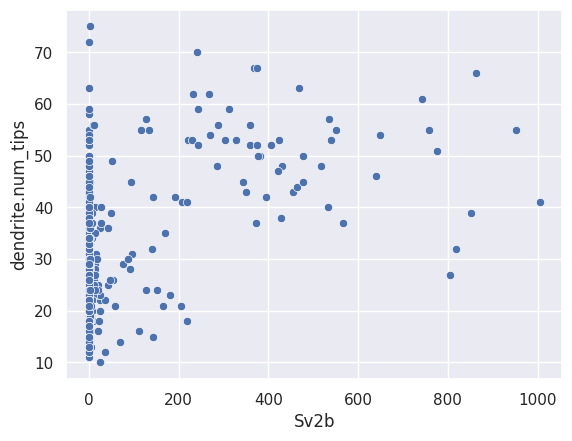

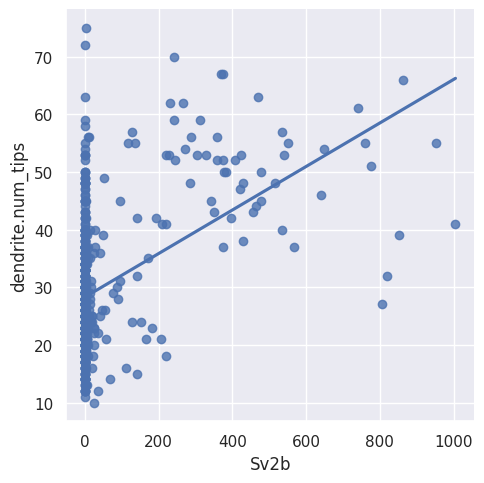

In [ ]:
sns.scatterplot(x=gene_data['Sv2b'], y=morph_data['dendrite.num_tips'])
sns.lmplot(data=cells, x='Sv2b', y='dendrite.num_tips', ci=None)

## Finding highest correlation coefficients


In [ ]:
# Gets all gene cols where the value for every cell is 0.
zero_genes = gene_data.columns[(gene_data == 0).all()]
# gene_data[zero_genes].sum().sum() # Double check these columns are 0

# Removes all of the columns in zero_genes from our dataframe
gene_data = gene_data.drop(zero_genes, axis="columns")

In [ ]:
gene_data.sum(axis="rows").min() # Check the minimum expression of each gene across all neurons
# Not 0 -> We've successfully deleted the zero columns

0.573763625451695

So far, we've found the correlation coefficient between pairs of columns (one morph feature vs one gene expression) to help get an idea of how correlated a single morphological feature and gene expression is across cells.

It can also be useful to find many correlation values at once to help us find what factors out of the thousands we have are most correlated to help us decide which to plot / investgiate further.

We can accomplish with the [corrwith()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html) method.

In [ ]:
# Get the correlations between each gene col and the dendrite.sa_to_vol column
sa_to_vol_cors = gene_data.corrwith(morph_data['dendrite.sa_to_vol'])

High negative values are also relevant bc they indicate inverse relationship, so for now we can just look at the abs value (magnitude) of the correlation coefficients.

In [ ]:
correlation_magnitudes = sa_to_vol_cors.abs() # Gets the absolute value (magnitude) of each correlation

5.39982276275182e-07

Let's sort the correlation values and find the highest ones:

In [ ]:
# Sort in descending order (biggest # first)
correlation_magnitudes.sort_values(ascending=False).head(10)

Col25a1          0.186690
6330416G13Rik    0.172039
Ate1             0.169452
8030451O07Rik    0.164726
Gcfc2            0.160754
Unc80            0.158629
Gpatch1          0.158524
BC048644         0.157528
Gtf3c1           0.156515
Chd4             0.153992
dtype: float64

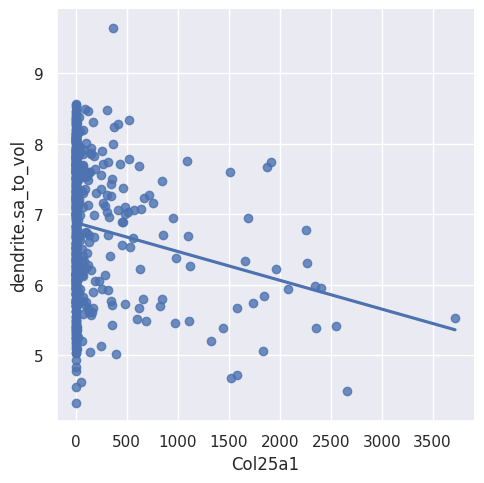

In [ ]:
# Plot our highest-magnitude correlation
sns.lmplot(data=cells, x='Col25a1', y='dendrite.sa_to_vol', ci=None)

In [ ]:
# Get correlations between total axon length and all genes
correlations = gene_data.corrwith(morph_data['axon.total_length'])

# Sort the absolute values of the correlations, get top 10
correlations.abs().sort_values(ascending=False).head(10)

Arpp21     0.461585
Slc17a7    0.395843
R3hdm1     0.394971
Car10      0.388338
Ptprd      0.387511
Pcsk2      0.385144
Rbfox1     0.382710
Coro6      0.374227
Sorcs3     0.372476
Nell2      0.370651
dtype: float64

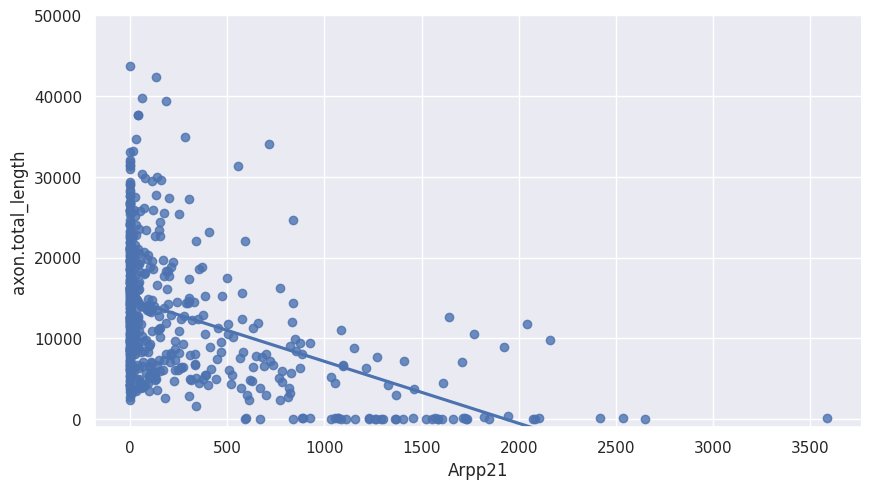

In [ ]:
sns.lmplot(data=cells, x='Arpp21', y='axon.total_length', ci=None, aspect=1.8).set(ylim=[-1000, 50000])

We just used corrwith() to correlate a single column with a lot of columns. If we want to get a matrix of correlations between two sets of columns, we can run corrwith() on each column of our dataframe.

In [ ]:
# Take each column in morph_data and run gene_data.corrwith(col) for that col
morph_gene_corrs = morph_data.apply(lambda col: gene_data.corrwith(col))

We can get the maximum correlation value and corresponding gene for each morphological feature:

In [ ]:
corr_magnitudes = morph_gene_corrs.abs()

In [ ]:
print(corr_magnitudes.max()) # Highest correlation value (to a gene) for each morph feature
print(corr_magnitudes.idxmax()) # Get the name of the column that each max

We can also show these values side-by-side using pd.concat() (which mashes two dataframes together)

In [ ]:
pd.concat([corr_magnitudes.max(), corr_magnitudes.idxmax()], axis='columns')

,0,1
axon.total_length,0.461585,Arpp21
all_neurites.total_length,0.407031,Arpp21
basal_dendrite.total_length,0.313626,Tmtc2
dendrite.total_length,0.486738,Celf2
dendrite.total_surface_area,0.442387,Slc17a7
axon.total_surface_area,0.420118,Arpp21
all_neurites.total_surface_area,0.359054,Rbfox1
basal_dendrite.total_surface_area,0.294983,Pclo
dendrite.total_volume,0.369273,Slc17a7
axon.total_volume,0.519513,Gm18673


In [ ]:
# dendrite.num_branches	has a really high max correlation - so let's look at more genes
abs_corrs = gene_data.corrwith(morph_data['dendrite.num_branches']).abs()

In [ ]:
abs_corrs.sort_values(ascending=False).head(30)

Arpp21           0.512190
Slc17a7          0.508691
Cacna2d1         0.499428
Ptprd            0.491913
R3hdm1           0.487666
Phactr1          0.482130
Nell2            0.480631
Celf2            0.479085
Nrgn             0.475427
Nlgn1            0.461476
Sv2b             0.458883
Ptk2b            0.458349
Pdzrn3           0.458225
Slc24a4          0.455782
Fam19a1          0.453304
Itpka            0.446871
Cobl             0.439213
2010300C02Rik    0.435725
Mapk4            0.429970
LOC101056001     0.429898
Meis2            0.427351
Arhgap10         0.417411
5031426D15Rik    0.416868
Hpca             0.414519
Gm11549          0.410882
Ldlrad4          0.409695
Kcnv1            0.409074
Bdnf             0.408751
Igfn1            0.408157
Arhgap32         0.407985
dtype: float64